In [1]:
import pandas as pd
import numpy as np

#graficas
import seaborn as sns
import plotly.express as px
from pylab import rcParams
import matplotlib.pyplot as plt

#k means, cluster de periodos
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#estandarización de variables
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

#modelo
import statsmodels.api as sm

In [2]:
df = pd.read_excel("GDP España dataset.xlsx")
df

,,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,1995T1,109165,69638,18762,23075,23894,26204
1,1995T2,116633,68678,21271,27616,26209,27141
2,1995T3,112398,69078,18687,24542,24721,24630
3,1995T4,122392,73512,22407,28486,25709,27722
4,1996T1,115776,73098,19699,24743,25705,27469
...,...,...,...,...,...,...,...
101,2020T2,251187,133094,63429,50439,69256,65031
102,2020T3,282149,162792,56383,58131,85498,80655
103,2020T4,299307,160817,69091,64717,93177,88495
104,2021T1,279459,159617,58975,58631,90843,88607


## Separamos los clusters

In [3]:
#ESTANDARIZACION D EVARIABLES

scaler = StandardScaler()
df_ = scaler.fit_transform(df.iloc[:,1:])
df_std = pd.DataFrame(df_, columns = ['Producto interior bruto a precios de mercado','Gasto en consumo final de los hogares y las ISFLSH','Gasto en consumo final de las AAPP','Formación bruta de capital','Exportaciones de bienes y servicios','Importaciones de bienes y servicios'])
df_std


,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,-1.990937,-1.906434,-1.727435,-1.972637,-1.765484,-1.958178
1,-1.867003,-1.935039,-1.548487,-1.673065,-1.670383,-1.913546
2,-1.937285,-1.923120,-1.732784,-1.875858,-1.731510,-2.033151
3,-1.771431,-1.791002,-1.467465,-1.615670,-1.690923,-1.885872
4,-1.881226,-1.803338,-1.660606,-1.862598,-1.691087,-1.897923
...,...,...,...,...,...,...
101,0.365965,-0.015657,1.458312,-0.167419,0.097996,-0.108756
102,0.879790,0.869244,0.955776,0.340027,0.765220,0.635452
103,1.164533,0.810395,1.862138,0.774509,1.080675,1.008889
104,0.835148,0.774639,1.140643,0.373012,0.984793,1.014224


In [4]:
df_std.insert(0, 'Año/Trimestre', df.iloc[:,0].values, allow_duplicates = False)
df_std

,Año/Trimestre,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,1995T1,-1.990937,-1.906434,-1.727435,-1.972637,-1.765484,-1.958178
1,1995T2,-1.867003,-1.935039,-1.548487,-1.673065,-1.670383,-1.913546
2,1995T3,-1.937285,-1.923120,-1.732784,-1.875858,-1.731510,-2.033151
3,1995T4,-1.771431,-1.791002,-1.467465,-1.615670,-1.690923,-1.885872
4,1996T1,-1.881226,-1.803338,-1.660606,-1.862598,-1.691087,-1.897923
...,...,...,...,...,...,...,...
101,2020T2,0.365965,-0.015657,1.458312,-0.167419,0.097996,-0.108756
102,2020T3,0.879790,0.869244,0.955776,0.340027,0.765220,0.635452
103,2020T4,1.164533,0.810395,1.862138,0.774509,1.080675,1.008889
104,2021T1,0.835148,0.774639,1.140643,0.373012,0.984793,1.014224


### K means

In [5]:
#definimos X

X = df_std.drop(["Año/Trimestre"], axis=1).values

In [6]:
inercias = list()

for k in range(1,27):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

C:\Users\leona\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[636.0,
 184.80714833899447,
 128.70506547062877,
 85.4041342135938,
 58.63040766156719,
 47.7397608687661,
 38.03979661208551,
 32.90746714942358,
 28.167061855119645,
 25.071088537170702,
 22.85008278625528,
 21.725883878613917,
 19.65827321433835,
 18.063768711026924,
 16.697969847944446,
 15.755429365315411,
 14.258966126547861,
 14.070313588215349,
 12.557150689004605,
 11.53340861576989,
 11.18831627561346,
 10.418976938513268,
 10.14761172432293,
 9.669932404480264,
 8.889438069646976,
 8.924031263959293]

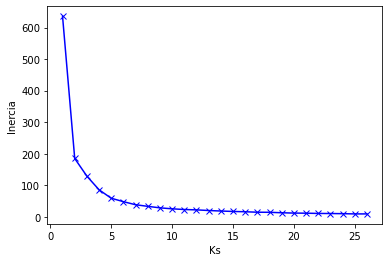

In [7]:
#VERIFICO AGRUPACIONES

plt.plot(range(1,27), inercias, 'bx-')
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [8]:
#NOMBRAMOS LOS CLUSTERS

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df["Clusters"] = kmeans.labels_

In [10]:
df_ = df[df["Clusters"] == 0]
df_.reset_index(inplace = True , drop = True)

In [11]:
#CLUSTER CON EL QUE VAMOS A TRABAJAR

df_

,,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios,Clusters
0,2004T2,217083,122902,38198,62686,56725,63428,0
1,2004T4,228041,130528,40570,68321,55496,66874,0
2,2005T1,219751,133736,37236,60916,52282,64419,0
3,2005T2,235008,132925,41901,70321,60996,71135,0
4,2005T3,226691,131507,36622,66833,59807,68078,0
...,...,...,...,...,...,...,...,...
63,2020T2,251187,133094,63429,50439,69256,65031,0
64,2020T3,282149,162792,56383,58131,85498,80655,0
65,2020T4,299307,160817,69091,64717,93177,88495,0
66,2021T1,279459,159617,58975,58631,90843,88607,0


In [12]:
#ESTANDARIZACION DE VARIABLES


scaler = StandardScaler()
df1 = scaler.fit_transform(df_.iloc[:,1:7].values)
df_std = pd.DataFrame(df1, columns = ['Producto interior bruto a precios de mercado','Gasto en consumo final de los hogares y las ISFLSH','Gasto en consumo final de las AAPP','Formación bruta de capital','Exportaciones de bienes y servicios','Importaciones de bienes y servicios'])
df_std.insert(0, "Año/Trimestre",df_.iloc[:,0:1].values, allow_duplicates = False)

In [13]:
df_std

,Año/Trimestre,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,2004T2,-2.356354,-2.732844,-1.978570,0.192579,-1.523093,-1.688964
1,2004T4,-1.867388,-2.110370,-1.645361,0.675019,-1.598359,-1.354068
2,2005T1,-2.237303,-1.848517,-2.113707,0.041041,-1.795189,-1.592654
3,2005T2,-1.556507,-1.914715,-1.458388,0.846249,-1.261532,-0.939967
4,2005T3,-1.927627,-2.030459,-2.199960,0.547624,-1.334347,-1.237058
...,...,...,...,...,...,...,...
63,2020T2,-0.834569,-1.900920,1.565774,-0.855946,-0.755678,-1.533178
64,2020T3,0.547014,0.523184,0.575982,-0.197396,0.239004,-0.014775
65,2020T4,1.312636,0.361974,2.361147,0.366463,0.709277,0.747148
66,2021T1,0.426981,0.264024,0.940095,-0.154589,0.566339,0.758032


## Metodologia Box Jenkins

### Analisis teorico de estacionariedad

In [14]:
 # APLICO LOGARTIMO A TODA LA SERIE
    
exog = np.log(df_.iloc[:,1:7].values)
df_log = pd.DataFrame(exog)
df_log.columns = ['Producto interior bruto a precios de mercado','Gasto en consumo final de los hogares y las ISFLSH','Gasto en consumo final de las AAPP','Formación bruta de capital','Exportaciones de bienes y servicios','Importaciones de bienes y servicios']
df_log

,Producto interior bruto a precios de mercado,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,12.288035,11.719143,10.550538,11.045893,10.945970,11.057661
1,12.337281,11.779343,10.610784,11.131972,10.924066,11.110566
2,12.300250,11.803623,10.525031,11.017251,10.864407,11.073164
3,12.367375,11.797540,10.643065,11.160826,11.018564,11.172335
4,12.331343,11.786815,10.508404,11.109952,10.998878,11.128409
...,...,...,...,...,...,...
63,12.433953,11.798811,11.057676,10.828520,11.145565,11.082619
64,12.550191,12.000229,10.939923,10.970454,11.356248,11.297936
65,12.609225,11.988022,11.143180,11.077779,11.442256,11.390701
66,12.540611,11.980532,10.984869,10.979019,11.416888,11.391966


<AxesSubplot:>

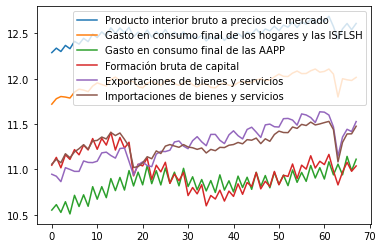

In [15]:
df_log.plot()

### Consumo Privado

In [16]:
#ANALISIS DE ESTACIONARIEDAD GASTO EN CONSUMO PRIVADO

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log.iloc[:,1:2], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.0980905674417083
p-valor:  0.24528308681111943
Valores críticos
1% -3.5463945337644063
5% -2.911939409384601
10% -2.5936515282964665


No es estacionario

In [17]:
#DIFERENCIACIAMOS PARA CORREGIR LA ESTACIONARIEDAD

cpriv_diff1 = df_log.iloc[:,1:2] - df_log.iloc[:,1:2].shift(1)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(cpriv_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.1866330727674765
p-valor:  0.21113260018482338
Valores críticos
1% -3.5463945337644063
5% -2.911939409384601
10% -2.5936515282964665


No es estacionario

In [18]:
#DIFERENCIACIAMOS NUEVAMENTE

cpriv_diff2 = df_log.iloc[:,1:2] - df_log.iloc[:,1:2].shift(2)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(cpriv_diff2.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.19701547963423
p-valor:  0.20733044832839947
Valores críticos
1% -3.5463945337644063
5% -2.911939409384601
10% -2.5936515282964665


No es estacionario

In [19]:
#DIFERENCIACIAMOS NUEVAMENTE

cpriv_diff3 = df_log.iloc[:,1:2] - df_log.iloc[:,1:2].shift(3)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(cpriv_diff3.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -3.158922507428486
p-valor:  0.022488967935191284
Valores críticos
1% -3.5463945337644063
5% -2.911939409384601
10% -2.5936515282964665


Es estacionario

### Consumo Público

In [20]:
#ANALISIS DE ESTACIONARIEDAD CONSUMO PUBLICO

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log.iloc[:,2:3], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -0.8333544751202364
p-valor:  0.8091276056265776
Valores críticos
1% -3.5506699942762414
5% -2.913766394626147
10% -2.5946240473991997


No es estacionario

In [21]:
#DIFERENCIACIAMOS PARA CORREGIR LA ESTACIONARIEDAD

cpubl_diff1 = df_log.iloc[:,2:3] - df_log.iloc[:,2:3].shift(1)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(cpubl_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.229809409976989
p-valor:  0.19560476420587347
Valores críticos
1% -3.552928203580539
5% -2.9147306250000002
10% -2.595137155612245


No es estacionario

In [22]:
#DIFERENCIACIAMOS NUEVAMENTE

cpubl_diff2 = df_log.iloc[:,2:3] - df_log.iloc[:,2:3].shift(2)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(cpubl_diff2.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -1.901249560663858
p-valor:  0.3314735064706623
Valores críticos
1% -3.5506699942762414
5% -2.913766394626147
10% -2.5946240473991997


In [31]:
#DIFERENCIACIAMOS NUEVAMENTE

cpubl_diff3 = df_log.iloc[:,2:3] - df_log.iloc[:,2:3].shift(3)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(cpubl_diff3.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.9310284989696602
p-valor:  0.04185695803208831
Valores críticos
1% -3.562878534649522
5% -2.918973284023669
10% -2.597393446745562


Es estacionario

### Capital Fijo

In [24]:
#ANALISIS DE ESTACIONARIEDAD K FIJO

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log.iloc[:,3:4], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -1.8766058308433273
p-valor:  0.3431452163713793
Valores críticos
1% -3.5386953618719676
5% -2.9086446751210775
10% -2.591896782564878


No es estacionario

In [25]:
#DIFERENCIACIAMOS PARA CORREGIR LA ESTACIONARIEDAD

kfijo_diff1 = df_log.iloc[:,3:4] - df_log.iloc[:,3:4].shift(1)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(kfijo_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.218618956079191
p-valor:  0.19955738045641608
Valores críticos
1% -3.5386953618719676
5% -2.9086446751210775
10% -2.591896782564878


No es estacionario

In [26]:
#DIFERENCIACIAMOS NUEVAMENTE

kfijo_diff2 = df_log.iloc[:,3:4] - df_log.iloc[:,3:4].shift(2)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(kfijo_diff2.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.239000286332944
p-valor:  0.19239620850411027
Valores críticos
1% -3.5386953618719676
5% -2.9086446751210775
10% -2.591896782564878


In [27]:
#DIFERENCIACIAMOS NUEVAMENTE

kfijo_diff3 = df_log.iloc[:,3:4] - df_log.iloc[:,3:4].shift(3)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(kfijo_diff3.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.1072790927811247
p-valor:  0.24159773354004788
Valores críticos
1% -3.5506699942762414
5% -2.913766394626147
10% -2.5946240473991997


In [32]:
kfijo_diff4 = df_log.iloc[:,3:4] - df_log.iloc[:,3:4].shift(4)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(kfijo_diff4.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.125652732268834
p-valor:  0.2343253846882591
Valores críticos
1% -3.5386953618719676
5% -2.9086446751210775
10% -2.591896782564878


### Exportaciones

In [28]:
#ANALISIS DE ESTACIONARIEDAD EXPORTACIONES

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log.iloc[:,4:5], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -1.843972740027002
p-valor:  0.3588591520823402
Valores críticos
1% -3.5352168748293127
5% -2.9071540828402367
10% -2.5911025443786984


Es estacionario 

In [29]:
#DIFERENCIACIAMOS PARA CORREGIR LA ESTACIONARIEDAD

expo_diff1 = df_log.iloc[:,4:5] - df_log.iloc[:,4:5].shift(1)

#CHEQUEAMOS ESTACIONARIEDAD

resultado = adfuller(expo_diff1.dropna(), maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -9.206137597110366
p-valor:  1.9426540038731826e-15
Valores críticos
1% -3.5352168748293127
5% -2.9071540828402367
10% -2.5911025443786984


Es estacionaria

### Importaciones

In [30]:
#ANALISIS DE ESTACIONARIEDAD IMPORTACIONES

from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df_log.iloc[:,5:6], maxlag = 12) #maxlag = 12 porque tenemos una muestra de tamaño 67
print('Estadistico: ', resultado[0])
print('p-valor: ', resultado[1])
print('Valores críticos')
for k,v in resultado[4].items():
    print(k,v)

Estadistico:  -2.600436547309812
p-valor:  0.09290707555061356
Valores críticos
1% -3.5319549603840894
5% -2.905755128523123
10% -2.5903569458676765


Es estacionario

### Dataframe con los valores transformados y estacionarizados de las variables

In [37]:
#CREO EL DATAFRAME VACIO

df_diff = pd.DataFrame()

#LO COMPLETO CON LAS VARIABLES TRANSFORMADAS
df_diff["Gasto en consumo final de los hogares y las ISFLSH"] = cpriv_diff3
df_diff["Gasto en consumo final de las AAPP"] = cpubl_diff3
df_diff["Formación bruta de capital"] = kfijo_diff2
df_diff["Exportaciones de bienes y servicios"] = expo_diff1
df_diff["Importaciones de bienes y servicios"] = df_log.iloc[:,5:6]

#REEMPLAZO NANS POR 0s
df_diff = df_diff.fillna(0)
df_diff

,Gasto en consumo final de los hogares y las ISFLSH,Gasto en consumo final de las AAPP,Formación bruta de capital,Exportaciones de bienes y servicios,Importaciones de bienes y servicios
0,0.000000,0.000000,0.000000,0.000000,11.057661
1,0.000000,0.000000,0.000000,-0.021904,11.110566
2,0.000000,0.000000,-0.028642,-0.059659,11.073164
3,0.078398,0.092527,0.028853,0.154156,11.172335
4,0.007472,-0.102380,0.092701,-0.019686,11.128409
...,...,...,...,...,...
63,-0.281801,0.164350,-0.336506,-0.322572,11.082619
64,-0.106869,-0.143726,-0.012412,0.210683,11.297936
65,-0.063231,0.203736,0.249259,0.086008,11.390701
66,0.181722,-0.072808,0.008564,-0.025368,11.391966


### Aplico modelo SARIMAX

In [40]:
#SELECCIONAMOS NUESTRA VARIABLE TARGET/ENDOGENA

producto = df_log.iloc[:,0:1]


#SELEECIONAMOS NUESTRAS VARIABLES EXOGENAS

exogenas = df_diff.iloc[:,0:5]


In [43]:
#APLICO EL MODELO SARIMAX


mod = sm.tsa.statespace.SARIMAX(producto,
                                exogenas,
                                order = (1,0,0),
                                trend=('ct'), #tendencia e intercepto de la serie
                            seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

C:\Users\leona\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                            SARIMAX Results                                             
Dep. Variable:     Producto interior bruto a precios de mercado   No. Observations:                   68
Model:                                         SARIMAX(1, 0, 0)   Log Likelihood                 127.294
Date:                                          Thu, 28 Oct 2021   AIC                           -236.588
Time:                                                  10:45:13   BIC                           -216.746
Sample:                                                       0   HQIC                          -228.737
                                                           - 68                                         
Covariance Type:                                            opg                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

C:\Users\leona\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


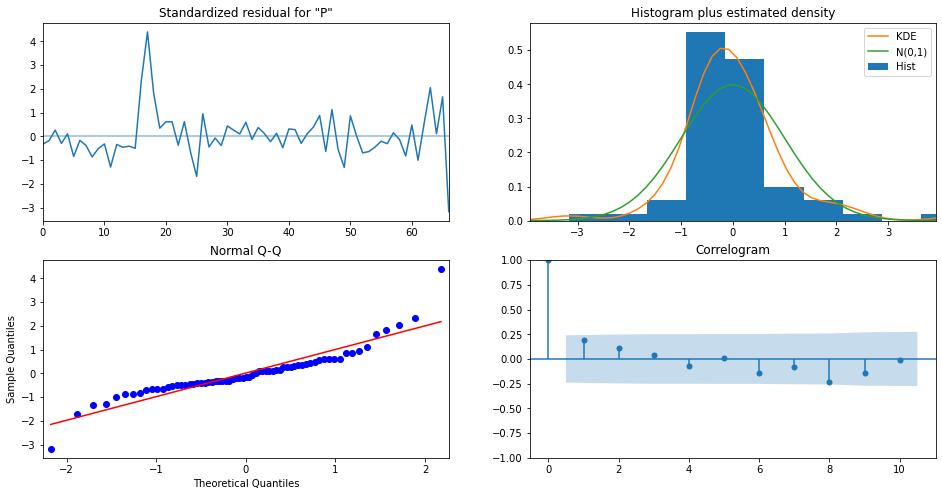

In [44]:
print(results.summary())

results.plot_diagnostics(figsize=(16, 8))
#plt.savefig("Salida-PBI.png",format  ="png", dpi = 100, bbox_inches='tight')
plt.show()

## Verificacion

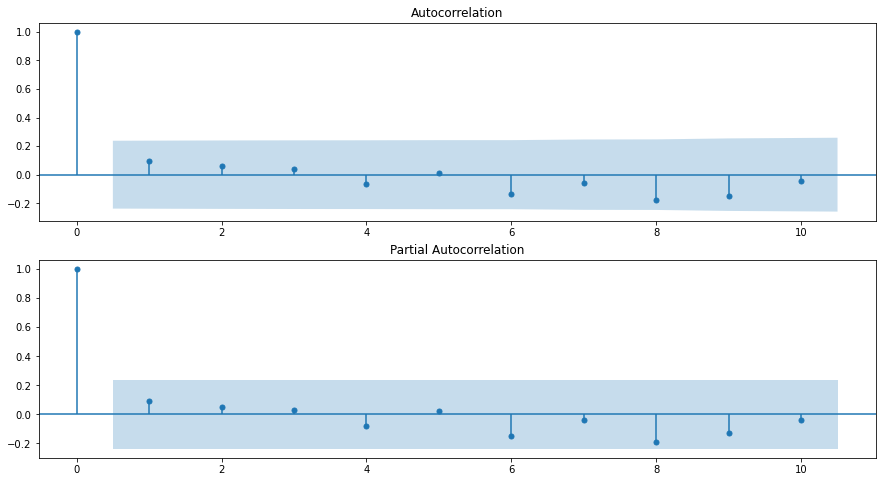

In [45]:
residuos = results.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(residuos, lags=10, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuos, lags=10, ax=ax[1])
plt.show()